First exploration of the data

In [1]:
import pandas as pd

path = r"C:\Users\Surface\Masterarbeit\data\Baseline.xlsx"

df = pd.read_excel(path)
#show first 5 rows of the dataset
display(df.head())

#get information about the data and the features
display(df.describe())
display(df.info())

,Matrizenradius [mm ],Stempelkantenradius [mm],Blechdicke [mm],Platinenabmessung [mm],1/4 Niederhalterkraft [N],Ziehtiefe [mm],x_Einzug [mm]
0,6,10,2.45,2.0,33752,22,7.1570
1,6,10,2.45,2.0,33752,24,8.1830
2,6,10,2.45,2.0,33752,26,9.2785
3,6,10,2.45,2.0,37502,22,7.0560
4,6,10,2.45,2.0,37502,24,8.0880


,Matrizenradius [mm ],Stempelkantenradius [mm],Blechdicke [mm],Platinenabmessung [mm],1/4 Niederhalterkraft [N],Ziehtiefe [mm],x_Einzug [mm]
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,7.000000,12.000000,2.500000,-0.500000,37502.000000,24.000000,8.106586
std,0.817057,1.634114,0.040853,2.042643,3063.964384,1.634114,1.107887
min,6.000000,10.000000,2.450000,-3.000000,33752.000000,22.000000,5.947500
25%,6.000000,10.000000,2.450000,-3.000000,33752.000000,22.000000,7.163000
50%,7.000000,12.000000,2.500000,-0.500000,37502.000000,24.000000,8.055500
75%,8.000000,14.000000,2.550000,2.000000,41252.000000,26.000000,9.022500
max,8.000000,14.000000,2.550000,2.000000,41252.000000,26.000000,10.751500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Matrizenradius [mm ]       729 non-null    int64  
 1   Stempelkantenradius [mm]   729 non-null    int64  
 2   Blechdicke [mm]            729 non-null    float64
 3   Platinenabmessung [mm]     729 non-null    float64
 4   1/4 Niederhalterkraft [N]  729 non-null    int64  
 5   Ziehtiefe [mm]             729 non-null    int64  
 6   x_Einzug [mm]              729 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 40.0 KB


None

In [ ]:
!pip install ydata-profiling --quiet

from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="📋 Datenprofil Baseline", explorative=True)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 52.03it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<function matplotlib.pyplot.show(close=None, block=None)>

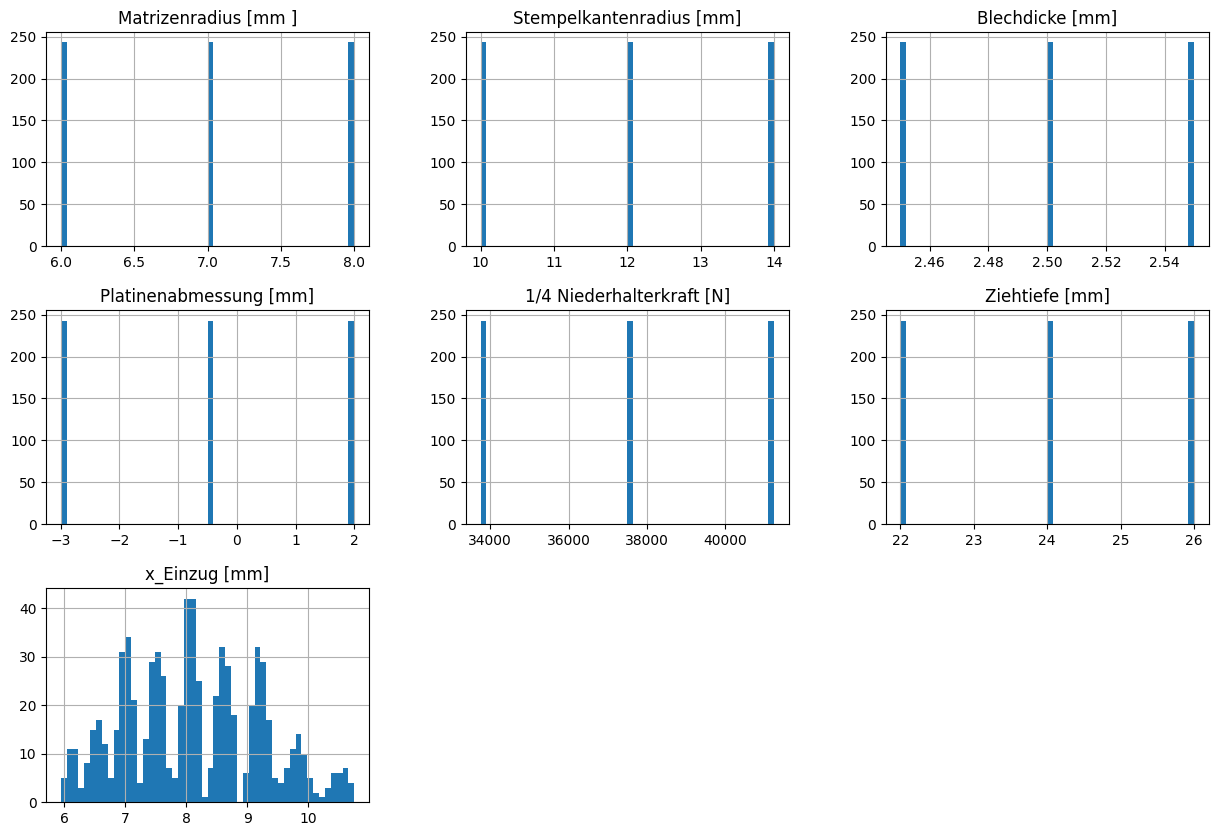

In [ ]:
import matplotlib.pyplot as plt

#have a look at the data distribution
df.hist(bins = 50, figsize= (15,10))
plt.show

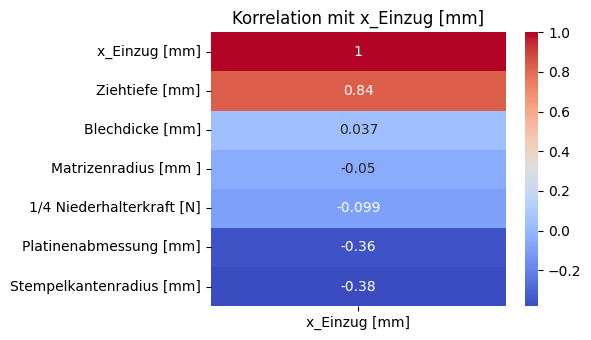

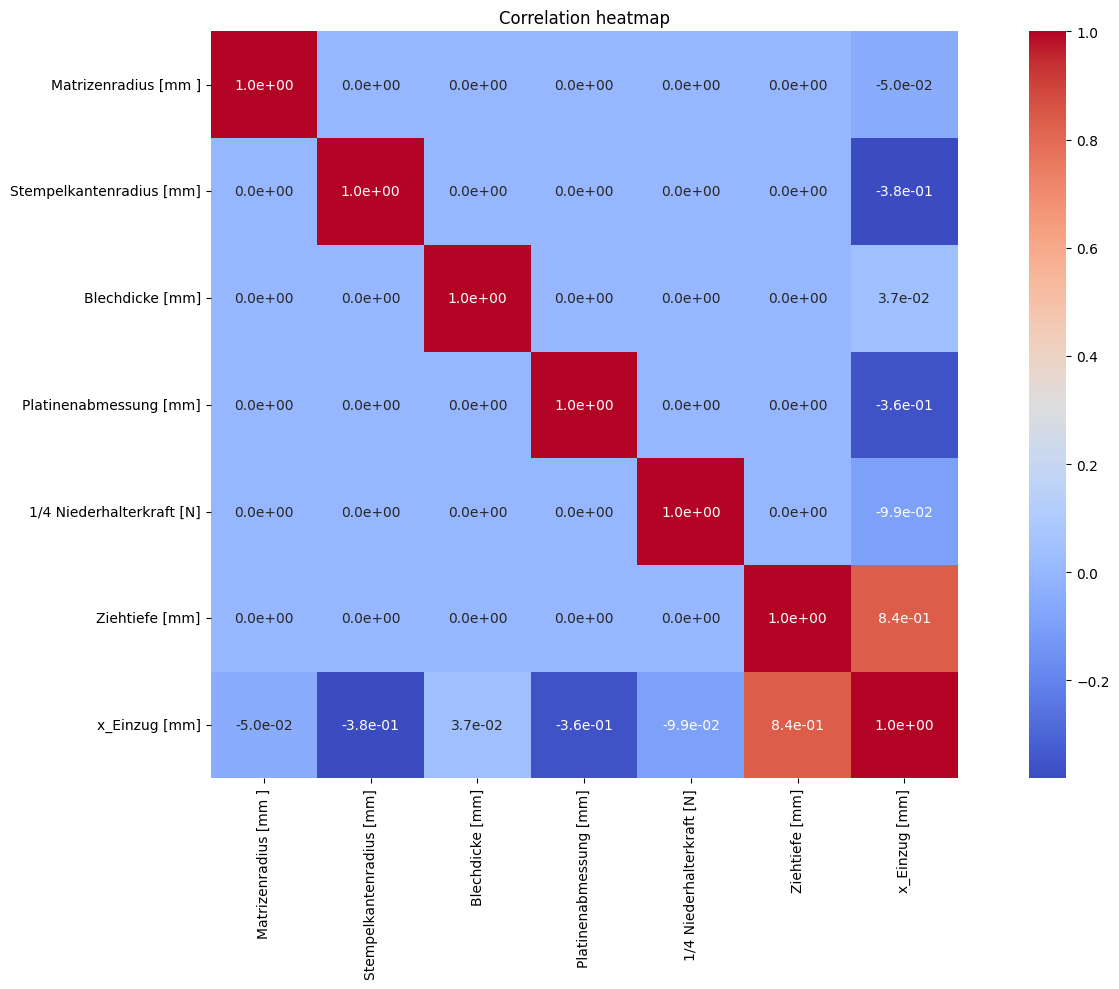

In [ ]:
from pandas.plotting import scatter_matrix
import seaborn as sns

target_attr = 'x_Einzug [mm]'

corr_matrix = df.corr(method = 'spearman') #Pearson correlation, assumption relationship is linear
#get a sorted correlation matrix
sorted_corr = corr_matrix[target_attr].sort_values(ascending=False)

#plot figure for the correlation with the target
plt.figure(figsize = (6, len(sorted_corr) * 0.5))
sns.heatmap(sorted_corr.to_frame(), annot= True, cmap = 'coolwarm', cbar = True)
plt.title(f'Korrelation mit {target_attr}')
plt.tight_layout()
plt.show()

#plot full correlation heatmap
plt.figure(figsize=(15 , 10))
sns.heatmap(corr_matrix, annot=True, fmt= '.1e', cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation heatmap")
plt.tight_layout()
plt.show()



Transformation Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

#get the numerical features
data_num = df.drop('x_Einzug [mm]', axis = 1)
#get the target values
data_labels = df['x_Einzug [mm]'].to_numpy()

#three different pipelines for preprocessing the data
#pipeline 1 is used

#Standard Scaler for distribution with 0 mean and 1 std., normal distributed data
data_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

#scales data according to median and Interquartildistance, for data with many outliers
data_pipeline1 = Pipeline([
    ('rob_scaler', RobustScaler())
])

#min max scalling for values between 0 and 1 (Normalization)
data_pipeline2 = Pipeline([
    ('Min_Max_Scaler', MinMaxScaler())
])

data_prep = data_pipeline.fit_transform(data_num)
# data_prep1 = data_pipeline1.fit_transform(data_num)
# data_prep2 = data_pipeline2.fit_transform(data_num)
# print(data_prep[:30])
# print(data_prep1[:30])
# print(data_prep2[:30])

X_train, X_test, y_train, y_test = train_test_split(data_prep, data_labels, test_size= 0.2, random_state=42)
print(X_train[:5])
print(y_train[:5])

[[ 0.         -1.22474487 -1.22474487  1.22474487  0.          0.        ]
 [ 0.          0.         -1.22474487  0.         -1.22474487  1.22474487]
 [ 1.22474487  1.22474487  0.         -1.22474487  1.22474487  1.22474487]
 [ 0.          1.22474487  0.          1.22474487  1.22474487  1.22474487]
 [-1.22474487  0.          1.22474487  1.22474487 -1.22474487  0.        ]]
[8.089  9.288  9.06   8.0435 7.678 ]


Neural Network with MC Dropout for Uncertainty quantification

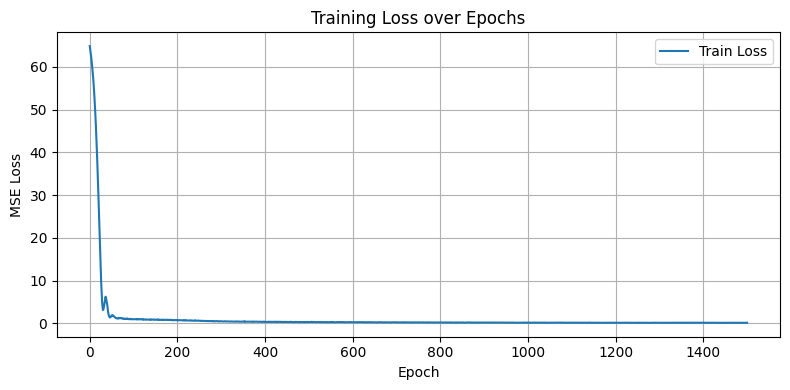

In [26]:
import torch
from IPython.display import clear_output
import numpy as np
from sklearn.metrics import r2_score

# Convert training and testing data to PyTorch tensors
X_tr = torch.from_numpy(X_train).float()
X_te = torch.from_numpy(X_test).float()
y_tr = torch.from_numpy(y_train).float().unsqueeze(1)  # Add extra dimension for compatibility
y_te = torch.from_numpy(y_test).float().unsqueeze(1)

# Define a fully connected neural network with ReLU activations and Dropout
dp = 0.05
model = torch.nn.Sequential(
    torch.nn.Linear(6, 64),     # Input layer -> 64 neurons
    torch.nn.ReLU(),
    torch.nn.Dropout(p = dp),   # Dropout Layer with 5% Neurons set to 0
    torch.nn.Linear(64, 128),   # Hidden layer -> 128 neurons
    torch.nn.ReLU(),
    torch.nn.Dropout(p = dp),   # Dropout Layer with 5% Neurons set to 0
    torch.nn.Linear(128, 64),   # Hidden layer -> 64 neurons
    torch.nn.ReLU(),
    torch.nn.Dropout(p = dp),   # Dropout Layer with 5% Neurons set to 0
    torch.nn.Linear(64, 1)      # Output layer -> 1 value (regression)
)

# Define Mean Squared Error loss function
loss_fn = torch.nn.MSELoss(reduction='mean')

# Set learning rate and optimizer
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr)

# Track loss history during training
loss_history = []

# Set model to training mode
model.train()
for i in range(2000):
    optimizer.zero_grad()               # Reset gradients
    y_pred = model(X_tr)                # Forward pass
    loss = loss_fn(y_pred, y_tr)        # Compute MSE loss
    loss.backward()                     # Backpropagation
    optimizer.step()                    # Update weights
    loss_history.append(loss.item())    # Save loss value

    # Update plot every 50 epochs
    if i % 500 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(8, 4))
        plt.plot(loss_history, label='Train Loss', color='tab:blue')
        plt.xlabel('Epoch')
        plt.ylabel('MSE Loss')
        plt.title('Training Loss over Epochs')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()


Plot the uncertainty interval for the NN with MC Dropout


R² Train: 0.9946 | R² Test: 0.9930


,True value,Prediction,Difference
0,6.590000,6.660581,-0.070581
1,8.100000,8.213598,-0.113598
2,9.231000,9.274611,-0.043611
3,7.623000,7.668697,-0.045697
4,9.253500,9.402107,-0.148607
5,10.484500,10.439030,0.045470
6,8.219000,8.471462,-0.252462
7,6.679500,6.688838,-0.009338
8,8.614500,8.600002,0.014498
9,7.534500,7.568156,-0.033656


Coverage: 100.00%


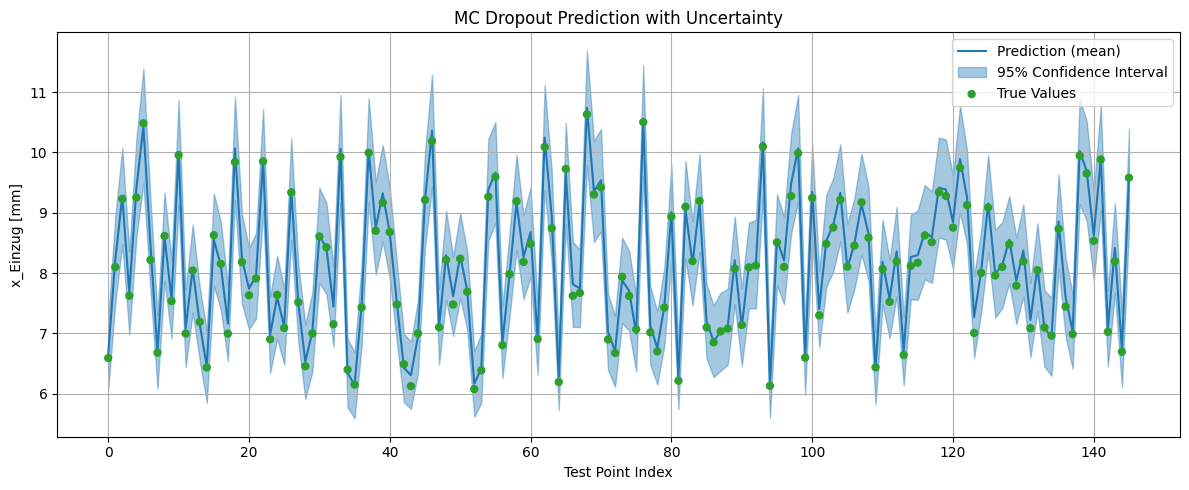

In [27]:
# Keep the model in training mode to keep dropout active
model.train()

# Make multiple stochastic predictions (MC Dropout)
n_samples = 1000
y_train_pred = torch.stack([model(X_tr) for i in range(n_samples)]).detach().numpy() #list comprehension for the number of stochastic forward passes for MC Dropout
y_test_pred = torch.stack([model(X_te) for i in range(n_samples)]).detach().numpy()

# Calculate the mean and standard deviation of the predictions on the train data
y_train_pred_mean = y_train_pred.mean(axis = 0)
y_train_Pred_std = y_train_pred.std(axis = 0)

# Calculate the mean and standard deviation of the predictions on the test data
y_test_pred_mean = y_test_pred.mean(axis = 0)
y_test_pred_std = y_test_pred.std(axis = 0)

# Calculate R² scores
r2_train = r2_score(y_train, y_train_pred_mean)
r2_test = r2_score(y_test, y_test_pred_mean)

# Create comparison DataFrame
vergleich_df = pd.DataFrame({
    'True value': y_test[:10],
    'Prediction': y_test_pred_mean[:10].flatten(),
    'Difference': y_test[:10] - y_test_pred_mean[:10].flatten()
})

# Print performance
print(f'\nR² Train: {r2_train:.4f} | R² Test: {r2_test:.4f}')

# Display predictions with color-coded differences
display(vergleich_df.style.background_gradient(cmap='RdYlGn_r'))

# Assign descriptive variable names for MC Dropout mean and standard deviation
mc_mean = y_test_pred_mean.flatten()  # Predicted mean for each test point
mc_std = y_test_pred_std.flatten()    # Predicted standard deviation for uncertainty

# Define the confidence interval bounds (95% CI ≈ mean ± 2*std)
mc_lower_bound = mc_mean - 2 * mc_std
mc_upper_bound = mc_mean + 2 * mc_std

# Check whether each true value lies within the 95% confidence interval
# If yes, the point will be green; if not, red
in_interval = (y_test >= mc_lower_bound) & (y_test <= mc_upper_bound)
colors = ['tab:green' if inside else 'tab:red' for inside in in_interval]

# Calculate coverage (percentage of true values within the CI)
coverage = np.mean(in_interval) * 100  # in percentage

# Print the coverage value
print(f"Coverage: {coverage:.2f}%")

# Create the plot
plt.figure(figsize=(12, 5))
x_axis = np.arange(len(y_te))  # Create an index axis for plotting

# Plot the predicted mean
plt.plot(x_axis, mc_mean, label="Prediction (mean)", color='tab:blue')

# Plot the confidence interval as a shaded region
plt.fill_between(x_axis, mc_lower_bound, mc_upper_bound, alpha=0.4,
                 color='tab:blue', label='95% Confidence Interval')

# Scatter plot of true values with color-coded points based on interval inclusion
plt.scatter(x_axis, y_te.flatten(), label="True Values", c=colors, s=25, zorder=3)

# Final plot settings
plt.title("MC Dropout Prediction with Uncertainty")
plt.xlabel("Test Point Index")
plt.ylabel("x_Einzug [mm]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
